In [1]:
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from nltk import FreqDist
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction import text
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import seaborn as sns

In [3]:
# Loaded DataFrame changed Subbreddit to true/false LegaladviceUK = True, legalAdvise=False
df= pd.read_csv('./data/CleanBothCom.csv')
df['subreddit'] = pd.get_dummies(df['subreddit'])['LegalAdviceUK']

In [4]:
# Seperated X and y variable and used train, test, split.
X = df['body']
y=df['subreddit']

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y)

### 1st Model

In [5]:
# used CountVectorizer on X_train and X_test
cvec = CountVectorizer()

X_train_cvec = cvec.fit_transform(X_train)
X_test_cvec = cvec.transform(X_test)


In [6]:
# Initiated Logistic Regression and fit a model using X_train and y_train
logreg = LogisticRegression()

logreg.fit(X_train_cvec,y_train)

C:\Users\nicrs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
# Shows accuracy for train and test. The scores imply that the model is overfit
print(logreg.score(X_train_cvec,y_train))
print(logreg.score(X_test_cvec,y_test))

0.9658174782328282
0.793036750483559


## Model 2

In [15]:
# Fit a diffenrent Logistic Regression with tunned hyperparameters and gives accuracy score for train and test data
cvec2 = CountVectorizer(max_df=.8,min_df=.01,stop_words='english')

X_train_cvec2 = cvec2.fit_transform(X_train)
X_test_cvec2 = cvec2.transform(X_test)

logreg2 = LogisticRegression()
logreg2.fit(X_train_cvec2,y_train)

print(logreg2.score(X_train_cvec2,y_train))
print(logreg2.score(X_test_cvec2,y_test))

0.7450822315382135
0.6890715667311412


<AxesSubplot:>

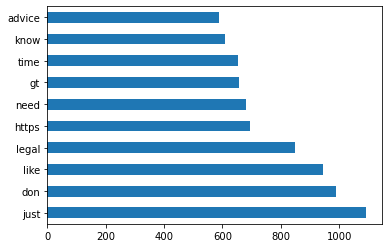

In [16]:
# Shows the 10 most common words in the X_train data set 
X_train_words_df = pd.DataFrame(X_train_cvec2.todense(),
                         columns= cvec2.get_feature_names())
X_train_words_df.sum().sort_values(ascending=False).head(10).plot(kind='barh')

### Pipeline Logistic Regression

In [10]:
# Makes a pipeline and gridsearch with diffrent LogisticRegression and CountVectorizer hyperparameters
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression())
])

pipe_params = {
    'cvec__max_features':[2000,3000,4000,5000],
    'cvec__min_df':[0,5],
    'cvec__max_df':[.9,1],
    'cvec__ngram_range':[(1,1),(1,2)],
    'cvec__stop_words':[None,'english']
}

gs = GridSearchCV(pipe, 
                  pipe_params,
                  cv=5)
gs.fit(X_train,y_train)

C:\Users\nicrs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nicrs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.9, 1],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [0, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english']})

In [12]:
# Shows accuracy for train and test. The scores imply that the model is overfit
gs.score(X_train,y_train), gs.score(X_test,y_test)

(0.9448564979039019, 0.7712765957446809)

In [13]:
# Shows the best parameters from the gridsearch 
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 5000,
 'cvec__min_df': 0,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

### Pipeline Decision Tree Classifier

In [24]:
# Makes a pipeline and gridsearch with diffrent DecisionTreeClassifier and CountVectorizer hyperparameters
pipe2 = Pipeline([
    ('cvec', CountVectorizer()),
    ('dt', DecisionTreeClassifier())
])

pipe_params2 = {
    'cvec__max_features':[2000,3000,4000,5000],
    'cvec__min_df':[0,5],
    'cvec__ngram_range':[(1,1),(1,2)],
    'cvec__stop_words':[None,'english']
}

gs2 = GridSearchCV(pipe2, 
                  pipe_params2,
                  cv=5)
gs2.fit(X_train,y_train)

In [26]:
# Shows accuracy for train and test. The scores imply that the model is very overfit
gs2.score(X_train,y_train),gs2.score(X_test,y_test)

(0.991454369558207, 0.6856866537717602)

In [28]:
# Shows the best parameters from the gridsearch 
gs2.best_params_

{'cvec__max_features': 4000,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

### Pipeline Naïve Bayes

In [52]:
# Makes a pipeline and gridsearch with diffrent Naïve Bayes and CountVectorizer hyperparameters
pipe3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', BernoulliNB())
])

pipe_params3 = {
    'cvec__max_features':[2000,3000,4000,5000],
    'cvec__min_df':[0,5],
    'cvec__ngram_range':[(1,1),(1,2)],
    'cvec__stop_words':[None,'english']
}

gs3 = GridSearchCV(pipe3, 
                  pipe_params3,
                  cv=5)

gs3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', BernoulliNB())]),
             param_grid={'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [0, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english']})

In [56]:
# Shows accuracy for train and test. The scores for train and test are the closest so far
gs3.score(X_train,y_train),gs3.score(X_test,y_test)

(0.8218316672041277, 0.7611218568665378)

In [54]:
# Shows the best parameters from the gridsearch
gs3.best_params_

{'cvec__max_features': 5000,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

### Extra Trees Classifier

In [29]:
# Makes a pipeline and gridsearch with diffrent ExtraTreesClassifier and CountVectorizer hyperparameters
pipe4 = Pipeline([
    ('cvec', CountVectorizer()),
    ('ef', ExtraTreesClassifier())
])

pipe_params4 = {
    'cvec__max_features':[3000,4000,5000],
    'cvec__min_df':[0,5],
    'cvec__ngram_range':[(1,1),(1,2)],
    'cvec__stop_words':[None,'english'],
    'ef__n_estimators':[100,150,200],
    'ef__max_depth':[None,1,2]
}

gs4 = GridSearchCV(pipe4, 
                  pipe_params4,
                  cv=5)
gs4.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('ef', ExtraTreesClassifier())]),
             param_grid={'cvec__max_features': [3000, 4000, 5000],
                         'cvec__min_df': [0, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english'],
                         'ef__max_depth': [None, 1, 2],
                         'ef__n_estimators': [100, 150, 200]})

In [30]:
# Shows accuracy for train and test. The scores imply that the model is still very overfit
gs6.score(X_train,y_train),gs6.score(X_test,y_test)

(0.9950016123831023, 0.7591876208897486)

In [31]:
# Shows the best parameters from the gridsearch
gs6.best_params_

{'cvec__max_features': 5000,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None,
 'ef__max_depth': None,
 'ef__n_estimators': 200}

### Pipeline Random Forest

In [33]:
# Makes a pipeline and gridsearch with diffrent RandomForestClassifier and CountVectorizer hyperparameters
pipe5 = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

pipe_params5 = {
    'cvec__max_features':[5000],
    'cvec__min_df':[0],
    'cvec__ngram_range':[(1,1)],
    'cvec__stop_words':[None],
    'rf__n_estimators':[100,150,200],
    'rf__max_depth':[None,1,2,3,4,5]
}

gs5 = GridSearchCV(pipe5, 
                  pipe_params5,
                  cv=5)

gs5.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'cvec__max_features': [5000], 'cvec__min_df': [0],
                         'cvec__ngram_range': [(1, 1)],
                         'cvec__stop_words': [None],
                         'rf__max_depth': [None, 1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150, 200]})

In [34]:
# Shows accuracy for train and test. The scores imply that the model is still very overfit
gs5.score(X_train,y_train),gs5.score(X_test,y_test)

(0.9950016123831023, 0.7408123791102514)

In [35]:
# Shows the best parameters from the gridsearch
gs6.best_params_

{'cvec__max_features': 5000,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None,
 'ef__max_depth': None,
 'ef__n_estimators': 200}

### Models with Lemmatized dataset 

In [36]:
# Loads the Lemmatized data. Changes the subbreddit to true/false LegaladviceUK = True, legalAdvise=False and train, test ,splits it
lem = pd.read_csv('./data/LemCleanBothCom.csv')
lem['subreddit'] = pd.get_dummies(lem['subreddit'])['LegalAdviceUK']


X_lem = lem['body']
y_lem= lem['subreddit']

X_train_lem,X_test_lem,y_train_lem,y_test_lem = train_test_split(X_lem,y_lem,stratify = y_lem)

### Lemmatized Data with LogisticRegression 

In [37]:
# Makes a pipeline and gridsearch using the lemmatized data with diffrent LogisticRegression and CountVectorizer hyperparameters
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression())
])

pipe_params = {
    'cvec__max_features':[2000,3000,4000,5000],
    'cvec__min_df':[0,5],
    'cvec__max_df':[.9,1],
    'cvec__ngram_range':[(1,1),(1,2)],
    'cvec__stop_words':[None,'english']
}

gs_lem = GridSearchCV(pipe, 
                  pipe_params,
                  cv=5)
gs_lem.fit(X_train_lem,y_train_lem)

C:\Users\nicrs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nicrs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.9, 1],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [0, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english']})

In [38]:
# Shows accuracy for train and test. The scores imply that the model is still very overfit
gs_lem.score(X_train_lem,y_train_lem),gs_lem.score(X_test_lem,y_test_lem)

(0.95565946468881, 0.778046421663443)

In [39]:
# Shows the best parameters from the gridsearch
gs_lem.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 5000,
 'cvec__min_df': 0,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None}

### Lemmatized Data With Naïve Bayes 

In [40]:
# Makes a pipeline and gridsearch using the lemmatized data with diffrent Naïve Bayes and CountVectorizer hyperparameters
pipe2 = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', BernoulliNB())
])

pipe_params2 = {
    'cvec__max_features':[2000,3000,4000,5000],
    'cvec__min_df':[0,5],
    'cvec__ngram_range':[(1,1),(1,2)],
    'cvec__stop_words':[None,'english']
}

gs_nb_lem = GridSearchCV(pipe2, 
                  pipe_params2,
                  cv=5)
gs_nb_lem.fit(X_train_lem,y_train_lem)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', BernoulliNB())]),
             param_grid={'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [0, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english']})

In [41]:
# Shows accuracy for train and test.
gs_nb_lem.score(X_train_lem,y_train_lem),gs_nb_lem.score(X_test_lem,y_test_lem)

(0.8305385359561431, 0.7567698259187621)

In [42]:
# Shows the best parameters from the gridsearch
gs_nb_lem.best_params_

{'cvec__max_features': 5000,
 'cvec__min_df': 0,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

### Models with Steming the dataset 

In [43]:
# loads the stem dataset changed subbreddit to true/false LegaladviceUK = True, legalAdvise=False
stem = pd.read_csv('./data/stemCleanBothCom.csv')
stem['subreddit'] = pd.get_dummies(stem['subreddit'])['LegalAdviceUK']

In [44]:
# train, test, splits the data
X_stem = stem['body']
y_stem= stem['subreddit']

X_train_stem,X_test_stem,y_train_stem,y_test_stem = train_test_split(X_stem,y_stem,stratify = y_stem)

### Stemmed Data With LogisticRegression

In [45]:
# Makes a pipeline and gridsearch using the stemmed data with diffrent LogisticRegression and CountVectorizer hyperparameters
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression())
])

pipe_params = {
    'cvec__max_features':[4000],
    'cvec__min_df':[0,5],
    'cvec__max_df':[.9,1],
    'cvec__ngram_range':[(1,1),(1,2)],
    'cvec__stop_words':[None,'english'],
    'logreg__C':[.01]
}

gs_stem = GridSearchCV(pipe, 
                  pipe_params,
                  cv=5)
gs_stem.fit(X_train_stem,y_train_stem)

C:\Users\nicrs\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicrs\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicrs\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\nicrs\anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\nicrs\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\nicrs\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('logreg', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.9, 1], 'cvec__max_features': [4000],
                         'cvec__min_df': [0, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english'],
                         'logreg__C': [0.01]})

In [49]:
# Shows accuracy for train and test.
gs_stem.score(X_train_stem,y_train_stem),gs_stem.score(X_test_stem,y_test_stem)

(0.8029667849080941, 0.7480657640232108)

In [47]:
# Shows the best parameters from the gridsearch
gs_stem.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 4000,
 'cvec__min_df': 0,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'logreg__C': 0.01}

### Stemmed Data With Naïve Bayes 

In [57]:
# Makes a pipeline and gridsearch using the stemmed data with diffrent LogisticRegression and CountVectorizer hyperparameters
pipe2 = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', BernoulliNB())
])

my_stop = ['ve','ll','comment dislike','message comment']
stop_words = text.ENGLISH_STOP_WORDS.union(my_stop)

pipe_params2 = {
    'cvec__max_features':[4000],
    'cvec__min_df':[0,5],
    'cvec__ngram_range':[(1,1),(1,2)],
    'cvec__stop_words':[None,'english'],
    'nb__alpha':[.2]
}

gs_nb2_stem = GridSearchCV(pipe2, 
                  pipe_params2,
                  cv=5)
gs_nb2_stem.fit(X_train_stem,y_train_stem)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', BernoulliNB())]),
             param_grid={'cvec__max_features': [4000], 'cvec__min_df': [0, 5],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english'],
                         'nb__alpha': [0.2]})

In [58]:
# Shows accuracy for train and test. This was the best score I could get relative to train and test accuracy
gs_nb2_stem.score(X_train_stem,y_train_stem),gs_nb2_stem.score(X_test_stem,y_test_stem)

(0.828281199613028, 0.77321083172147)

In [59]:
# Shows the best parameters from the gridsearch
gs_nb2_stem.best_params_

{'cvec__max_features': 4000,
 'cvec__min_df': 0,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'nb__alpha': 0.2}

In [60]:
# Makes a confusion matrix from my prediction using the stemmed data and Naïve Bayes 
preds = gs_nb2_stem.predict(X_test_stem)
cm = confusion_matrix(y_test_stem, preds)

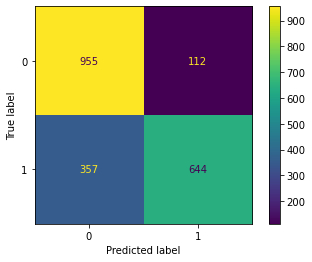

In [62]:
# Displays a confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [63]:
# Accuracy for UK comments

644/(357+644)

0.6433566433566433

In [64]:
# Accuracy for US comments
955/(955+112)

0.895032802249297

In [66]:
# Makes a Dataframe showing the coefficients for each word
coef_dict = {'names':gs_nb2_stem.best_estimator_['cvec'].get_feature_names(),'coefs':gs_nb2_stem.best_estimator_['nb'].coef_.ravel()}
coef_df=pd.DataFrame(coef_dict)

In [67]:
# Shows the strongest words for US comments
coef_df.sort_values('coefs',ascending=True)

,names,coefs
3013,renters,-9.616605
143,accounting,-9.616605
1804,hurts,-9.616605
3626,ticketed,-9.616605
1832,illinois,-9.616605
...,...,...
3607,think,-2.343513
3631,time,-2.319514
2114,like,-2.180577
1167,don,-1.973602


In [68]:
# Shows the strongest words for UK comments
coef_df.sort_values('coefs',ascending=False).head(15)

,names,coefs
1994,just,-1.866852
1167,don,-1.973602
2114,like,-2.180577
3631,time,-2.319514
3607,think,-2.343513
2073,legal,-2.353977
3829,ve,-2.371664
2386,need,-2.375239
2016,know,-2.396963
2141,ll,-2.517403
